In [1]:
# packages
using Distributions
using Random
using Plots
using Distances

In [2]:
# ackley function

function ackley(x)
    # x = [x1, x2, ..., xd]
    # a = default value 20
    # b = default value 0.2
    # c = default value 2*pi
    a = 20
    b = 0.2
    c = 2*π
    n = length(x)
    sum1 = 0
    sum2 = 0
    for i in 1:n
        sum1 += x[i]^2
        sum2 += cos(c*x[i])
    end
    
    term1 = -a * exp(-b*sqrt(sum1/n))
    term2 = -exp(sum2/n)
    y = term1 + term2 + a + exp(1)
    return y
end

ackley (generic function with 1 method)

In [2]:
# rastrigin function

function rastrigin(x)
    val = -10length(x)
    n = length(x)
    for i in 1:n
        val += -x[i]^2+10cos(π*x[i])
    end
    val =-val
    return val
end

rastrigin (generic function with 1 method)

In [4]:
# zirilli function

function zirilli2(x)
    x1 = x[1]
    x2 = x[2]
    val = (0.5 * (x1 ^ 2)) + (0.5 * (1 - cos(2*x1)) ) + (x2 ^ 2)
    return val
end

zirilli2 (generic function with 1 method)

In [5]:
# matyas function

function matyas2(x)
    x1 = x[1]
    x2 = x[2]
    val = (0.26 * ((x1 ^ 2) + (x2 ^ 2) ))  - (0.48 * x1 * x2)
    return val
end

matyas2 (generic function with 1 method)

In [25]:
# De Jong (sphere) function

sphere(x)=sum(x.^2)

sphere (generic function with 1 method)

In [7]:
# Schwefel 2.22 function

function schwefel_2_22(x)
    sum = 0
    prod = 1
    n = length(x)
    for i in 1:n
        sum += abs(x[i])
        prod *= abs(x[i])
    end
    val = sum+ prod
    return val
end

schwefel_2_22 (generic function with 1 method)

In [3]:
# population generator
function rand_population_uniform(n, d, a, b)
    # n = population size
    # a = lower bound
    # b = upper bound
    # d = dimensions
    return [convert(Array{Float64},rand(a:b,d)) for i in 1:n]
end

rand_population_uniform (generic function with 1 method)

In [48]:
# benchmark / landscape function


#obj_func(x) = sphere(x)
#obj_func(x) = schwefel_2_22(x)

#obj_func(x) = ackley(x)
obj_func(x) = rastrigin(x)

#obj_func(x) = matyas2(x)
#obj_func(x) = zirilli2(x)

obj_func (generic function with 1 method)

In [5]:
# intensity function

function intensity(N, x, x_prey)
    d = zeros(N)
    S = zeros(N)
    I = zeros(N)
    for i in 1:N-1
        d[i] = euclidean(x[i], x_prey) ^ 2
        S[i] = euclidean(x[i],x[i+1]) ^ 2
    end
    
    d[N] = euclidean(x[N], x_prey)
    S[N] = euclidean(x[N],x[1])
    
    
    
    for i in 1:N
        r2 = rand(Uniform(0,1))
        I[i] = r2 * S[i] / (4 * π * d[i] )
    end
    return I
end

intensity (generic function with 1 method)

In [6]:
# Honey Badger Algorithm

function honey_badger_algorithm(t_max, N, beta, C, x, obj_func)
    # t_max = maximum no of iterations
    # N = population size
    # beta = default value as 6
    # C = default value as 2
    # x = initial population
    # obj_func = benchmark function
    # f = fitness of the population
    # x_prey = best position found so far
    # f_prey = best fitness value so far for the x_prey
    # x_new = new position calculated for the ith honey badger
    # f_new = new fitness calculated for the ith honey badger
    # I = intensity of the honey badger
    # F = disturbance direction
    
    #calucalte the fitness of each honey badger
    f = obj_func.(x)
    #println("fitness vecor: ", f)
    
    #save best posiiton and fitness
    f_prey, x_prey_index = findmin(f)
    x_prey = x[x_prey_index]
    #println("best solution: ", x_prey, " fitness: ", f_prey)
    println("fitness: ", f_prey)
    fitness_values = []
    push!(fitness_values,(0,f_prey))
    for t in 1:t_max
        
        #println("iteration: ", t)
        
        #calculate the density factor / decreasing factor
        alpha = C * exp(-t / t_max)
        #println("alpha: ", alpha)
        
        #calcualte the intensity of the all honey badgers
        I = intensity(N, x, x_prey)
        #println("Intensity: ", I)
        
        for i in 1:N
            
            #println("Honey badger #: ", i)
            
            #calcuate distance between prey and ith honey badger
            d = x_prey - x[i]
            
            #generate disturbance
            r6 = rand(Uniform(0,1))
            if r6<=0.5
                F = 1
            else
                F = -1
            end
            
            
            #generate a random value to deicde between digging vs honey mode
            r2 = rand(Uniform(0,1))
            
            #TODO : if intensity is infinite then go for honey mode
            if isinf(I[i])
                r2 = 0.9
            end
            
            if r2<0.5
                # digging mode
                #println("Digging mode")
                r3 = rand(Uniform(0,1))
                r4 = rand(Uniform(0,1))
                r5 = rand(Uniform(0,1))
                #println("Intensity: ", I[i])
                #p = abs(cos(2*π*r4) * (1 - cos(2*π*r5)))
                #println("cos value: ", p)
                x_new = x_prey + (F * beta * I[i] * x_prey) + (F * r3 * alpha * d * abs(cos(2*π*r4) * (1 - cos(2*π*r5))))
                f_new = obj_func(x_new)
            
            else
                # honey node
                #println("Honey mode")
                r7 = rand(Uniform(0,1))
                x_new = x_prey + (F * r7 * alpha * d)
                f_new = obj_func(x_new)
            end
            
            #TODO: mange xnew to be within the bounds
            
            # evaluate the new posiiton and fitness values
            
            #local position update
            if f_new < f[i]
                #println("local position is improved")
                #println("values", x[i], ";", x_new, ";", f[i], ";", f_new  )
                x[i] = x_new
                f[i] = f_new
                
                #println("local position is improved fin")
            end
            
            #prey position update
            if f_new<f_prey
                #println("prey position is improved with honey badger # ", i)
                x_prey = x_new
                f_prey = f_new
            end
            
        end
        push!(fitness_values,(t,f_prey))
        #println("fitness: ", f_prey)
    end
   return x_prey, f_prey, fitness_values 
end
    

honey_badger_algorithm (generic function with 1 method)

fitness: 481.605410846705
best solution: [-5.096844176676214e-9, -1.5936484280302902e-9, 1.094450419980045e-9, 1.7632051748094567e-9, 4.272904016296953e-9, -3.948706602853239e-9, -2.4221245425191586e-10, -1.0429111840636052e-9, 1.7955026810247343e-9, 5.288248916845855e-10, -7.273510303521691e-10, -5.2189654612996536e-11, 4.695307603128949e-9, -2.3579622890306933e-9, 2.6985585511876847e-9, 1.9829372791953945e-9, -2.7753454947549356e-9, 1.9859295067092107e-10, -2.0300693983242706e-9, -3.986465251157629e-9, 1.0136142785791579e-9, -1.5017050150179535e-9, 2.9523127458627083e-9, 2.080794302809828e-9, 8.977292130648801e-11, -2.767375847728999e-9, 5.41764023239386e-10, 1.4532163424042636e-9, -1.2259362223179658e-9, -9.84544965540738e-10] fitness: -0.0
****Convergennce Graph****
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 

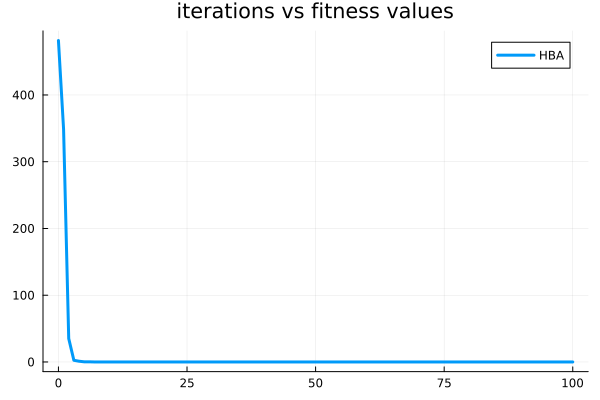

In [60]:
#import Random: seed!

#seed!(0) # set random seed for reproducible results

#dimensions
d = 30
#lower bound
a = -5.12
#upper bound
b = 5.12
# population size
N = 50
#iterations
t_max = 100
#constant beta
beta = 6
#constant C
C = 2
#generate honey badgers
x = rand_population_uniform(N, d, a, b)

#println("intitial population: ", x)
x_prey, f_prey, fitness_values = honey_badger_algorithm(t_max, N, beta, C, x, obj_func)
println("best solution: ", x_prey, " fitness: ", f_prey)

println("****Convergennce Graph****")
x_val = first.(fitness_values)
y_val = last.(fitness_values)
println(x_val)
println(y_val)

plot(x_val, y_val, title="iterations vs fitness values", label="HBA", linewidth=3)




Genetic Algorithm

In [43]:

# benchmark function
fg(x)= 1/obj_func(x)



fg (generic function with 1 method)

In [44]:
# best fitness of population
function best_cost(population)
    return minimum(obj_func.(population))
end


best_cost (generic function with 1 method)

In [46]:
function genetic_algorithm(fg, population, max_iter, S, C, M)
    # f: fitness
    # population: initial population
    # max_iter: nubmer of iterations (generations)
    # S: selection method
    # C: crossover method
    # M: mutation method
    
    #every row will have 3 attributes ->  1. Generation #, 2. Best fitness, 3. avg fitness
    beststats = zeros(max_iter)
    avgstats = zeros(max_iter)
    cost_values = []
    bestsofar = best_cost(population)
    push!(cost_values,(0,bestsofar))
    for k in 1:max_iter
        #print("generation: ", k)
        #print(" avg fitness at start: ", average_fitness(population))
        parents = select(S, fg.(population))
        #println("parents: ", parents)
        children = [crossover(C,population[p[1]],population[p[2]]) for p in parents]
        #println("children: ", children)
        #print(" avg fitness after S+C: ", average_fitness(children))
        population = [ mutate(M, child) for child in children ]
        #println(" avg fitness after M: ", average_fitness(population))
        #println("Best: ", best_fitness(population))
        #println("Average: ", average_fitness(population))
        #beststats[k] = best_cost(population)
        #avgstats[k] = average_cost(population)
        bestgen = best_cost(population)
        if bestgen<bestsofar
            bestsofar = bestgen
        end
        push!(cost_values,(k,bestsofar))
    end
    #println("final population: ", population)
    return population[argmin(obj_func.(population))], cost_values
end

genetic_algorithm (generic function with 1 method)

In [9]:
abstract type SelectionMethod end

# Roulette Wheel Selection
# probablity of being selected is propotional to the abolute fitness value
struct RouletteWheelSelection <: SelectionMethod end
function select(t::RouletteWheelSelection, y)
    #y : fitness vector of the population
    #println("Fitness vector: ", y)
    
    #probablity vector
    p = [y[i]/sum(y) for i in 1:length(y)]
    #println("probablity of selection vector: ", p)
    
    #cumulative probability vector
    cp = zeros(length(p))
    for i in 1:length(p)
        if i > 1
           cp[i] = cp[i-1] + p[i]
        else
            cp[i] = p[i]
        end
    end
    #println("cumulative probability of selection vector: ", cp)
    
    getparent() = begin
        r = rand(Uniform(0,1))
        index = 1
        for j in 1:length(cp)
            if r > cp[j]
               index += 1
            end
        end
        return index
    end
    
    return [[getparent(), getparent()] for i in y]
        
end

select (generic function with 1 method)

In [10]:
#crossover
abstract type CrossoverMethod end

struct SinglePointCrossover <: CrossoverMethod end
function crossover(c::SinglePointCrossover, a, b)
    i = rand(1:length(a))
    return vcat(a[1:i], b[i+1:end])
end

crossover (generic function with 1 method)

In [11]:
#mutation
abstract type MutationMethod end

struct Mutation <: MutationMethod
    μ
    a
    b
end

function mutate(M::Mutation, child)
    [rand(Uniform(0,1)) < M.μ ? rand(M.a:1:M.b) : v for v in child]
end

mutate (generic function with 1 method)

best solution: [1.88, -0.12, -0.12, -4.12, 1.88, -0.12, -0.12, -0.12, 1.88, -0.12, -0.12, -2.12, 1.88, -1.12, -2.12, -1.12, 3.88, -0.12, -0.12, 3.88, -2.12, 1.88, 1.88, -0.12, 1.88, 1.88, -0.12, 0.88, 1.88, -0.12] fitness: 172.6856433868197
****Convergennce Graph****
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[479.5388216934098, 479.5388216934098, 462.72541084670496, 462.72541084670496, 403.05882169340987, 403.05882169340987, 403.05882169340987, 403.05882169340987, 403.05882169340987, 403.05882169340987, 361.46329197564495, 361.46329197564495, 361.46329197564495, 361.46329197564495, 351.0543514111749, 351.0543514111749, 351.0543514111749, 

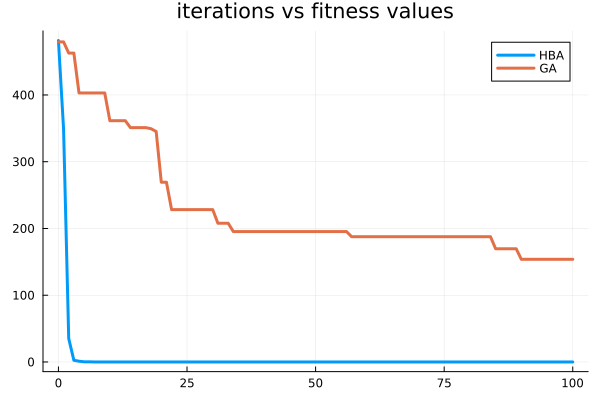

In [61]:
import Random: seed!

seed!(0) # set random seed for reproducible results

#dimensions
d = 30
#lower bound
a = -5.12
#upper bound
b = 5.12
# population size
m =50
#iterations
k_max = 100
#generate random individuals
population = rand_population_uniform(m, d, a, b)

#selection method
S = RouletteWheelSelection()
#crossover method
C = SinglePointCrossover()
#mutation method
M = Mutation(0.01,a,b)

#println("intitial population: ", population)
x, fitness_values = genetic_algorithm(fg, population, k_max, S, C, M)
println("best solution: ", x, " fitness: ", obj_func(x))

println("****Convergennce Graph****")
x_val = first.(fitness_values)
y_val = last.(fitness_values)
println(x_val)
println(y_val)

plot!(x_val, y_val, title="iterations vs fitness values", label="GA", linewidth=3)
